<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/An%C3%A1lisisdeSentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar Librerias-Diccionarios

In [ ]:
!pip install -U spacy #La nube grande del análisis de sentimientos
!spacy download es_core_news_lg
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


1. Hacemos operativas las librerias de análisis

In [ ]:
import spacy
import nltk #Natural Language Toolkit
from nltk.tokenize import word_tokenize,sent_tokenize
from textblob import TextBlob #Traductor 70 idiomas

ejemplo="Asustado, corrió como nunca había corrido en su vida. Olvidó que corría directo al precipicio"

#Separador de palabras y oraciones
nltk.download('punkt')

#Para separar por palabras
ej_tk=word_tokenize(ejemplo)
print("Por palabras",ej_tk)

#Separar por oraciones
ej_tks=sent_tokenize(ejemplo)
print("Por sentencias",ej_tks)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Por palabras ['Asustado', ',', 'corrió', 'como', 'nunca', 'había', 'corrido', 'en', 'su', 'vida', '.', 'Olvidó', 'que', 'corría', 'directo', 'al', 'precipicio']
Por sentencias ['Asustado, corrió como nunca había corrido en su vida.', 'Olvidó que corría directo al precipicio']


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') #Traductor a 70 Idiomas


nlx=open('/content/ContextoEconomicoColombia_2024_2.txt').read()
nlx2=open('/content/ContextoEconomicoColombia_2022.txt').read()

#Se procede con la tokenización de los datos
nlx_tks=sent_tokenize(nlx)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


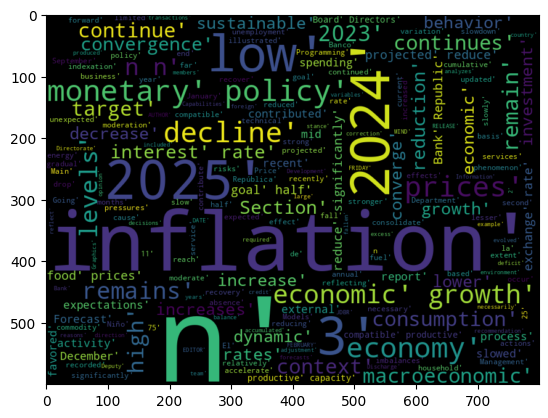

In [ ]:
from configparser import Interpolation
#Crear una nube de palabras (saber cuales son las palabras que más aparecen)
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp=spacy.load('en_core_web_sm')
doc=nlp(nlx)

tk_sac=[token.text for token in doc if not token.is_stop] #Sin articulos y conjunciones

wc=WordCloud(width=800,height=600).generate(str(tk_sac))
plt.imshow(wc,interpolation='bilinear')

3. Se procede a la obtención del informe

In [ ]:
sia=SentimentIntensityAnalyzer()
Xtoks=[];Xpol=[]

for tokens in nlx_tks:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores['compound'])

[0.0,
 0.128,
 0.7778,
 0.6808,
 0.3919,
 0.0,
 0.128,
 0.0,
 0.7003,
 -0.2263,
 0.0,
 0.0,
 -0.34,
 0.0,
 0.5994,
 0.128,
 -0.2732,
 -0.4404,
 0.128,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.128,
 0.7778,
 0.6808,
 0.3919,
 0.0,
 0.128,
 0.0,
 0.7003,
 -0.2263,
 0.0,
 0.0,
 -0.34,
 0.0,
 0.5994,
 0.128,
 -0.2732,
 -0.4404,
 0.128,
 0.0258,
 0.0,
 -0.3612,
 0.4588,
 0.4019,
 0.0,
 0.5423,
 0.7717]

In [ ]:
#Creamos el Informe
import numpy as np

pd.DataFrame(np.column_stack((Xtoks,Xpol))) #Pega las dos columnas
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol)))
dfm.columns=["Sentences","Polarity"]
dfm.to_excel("Informe.xlsx")

In [ ]:
#Traducir a Ingles
blob=TextBlob(nlx2)
tblob=blob.translate(from_lang='es',to='en')
print(tblob)

This report, on which the technical team makes its monetary policy recommendation, will be published on the business day following the meeting of the Board of Directors of January, April, July and October.
In the first quarter, annual inflation (8.5 %) continued to increase and overcome the forecasts of the market average and the technical team of the bank. In the run of the year all the large baskets of the Consumer Price Index (CPI) accelerated, and in March their annual variations are above 3 %. The Food Group (25.4 %) continued to be the one that contributed the most to the increase in inflation, affected, in large part, by deterioration in the external offer and by increasing costs of agricultural inputs. The increase in prices of some public services (energy and gas) and transport explained the acceleration in the regulated basket (8.3 %). For its part, the greatest persistence of supply and external costs, the effects of indexation, accumulated inflationary pressures from the ex